Carregando dados dos resultados...
  Carregado: Macro - Normal
  Carregado: Macro - Direção
  Carregado: Macro - Média Móvel
  Carregado: Macro - Buy and Hold
  Carregado: Micro - Normal
  Carregado: Micro - Direção
  Carregado: Micro - Média Móvel
  Carregado: Micro - Buy and Hold
  Carregado: MacroMicro - Normal
  Carregado: MacroMicro - Direção
  Carregado: MacroMicro - Média Móvel
  Carregado: MacroMicro - Buy and Hold
  Carregado: Kfold - Normal
  Carregado: Kfold - Direção
  Carregado: Kfold - Média Móvel
  Carregado: Kfold - Buy and Hold

Dados unidos com sucesso.
  Gerando gráfico para experimento: Kfold


C:\Users\leona\AppData\Local\Temp\ipykernel_21152\2883657041.py:92: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', n_strategies)


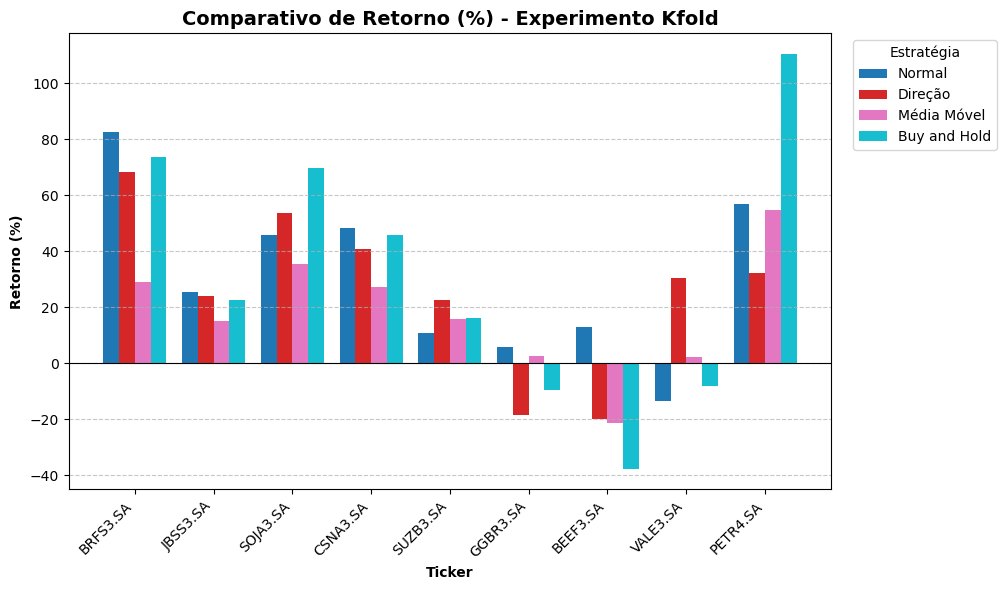

  Gerando gráfico para experimento: Macro


C:\Users\leona\AppData\Local\Temp\ipykernel_21152\2883657041.py:92: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', n_strategies)


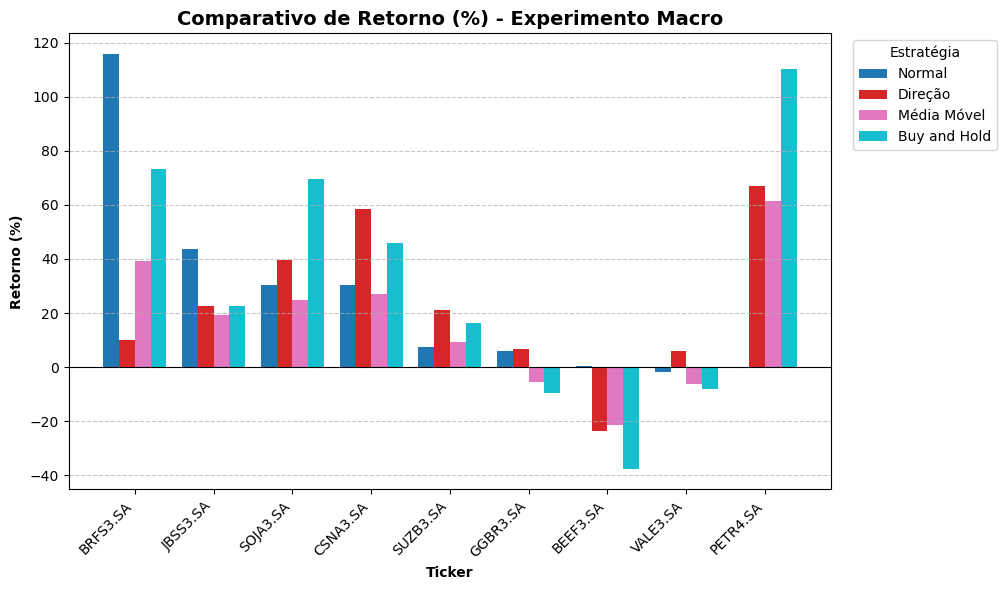

  Gerando gráfico para experimento: MacroMicro


C:\Users\leona\AppData\Local\Temp\ipykernel_21152\2883657041.py:92: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', n_strategies)


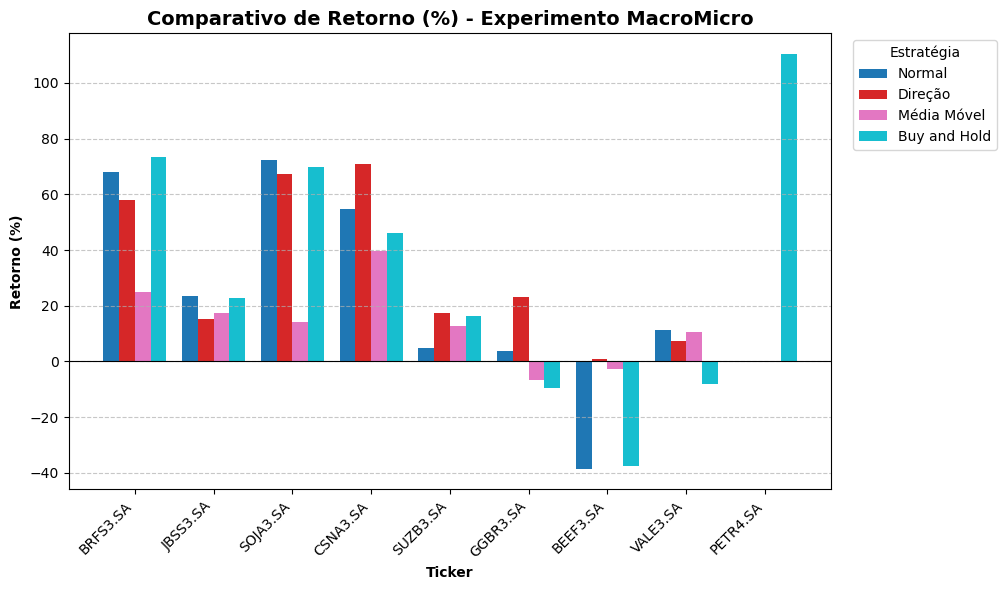

C:\Users\leona\AppData\Local\Temp\ipykernel_21152\2883657041.py:92: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', n_strategies)


  Gerando gráfico para experimento: Micro


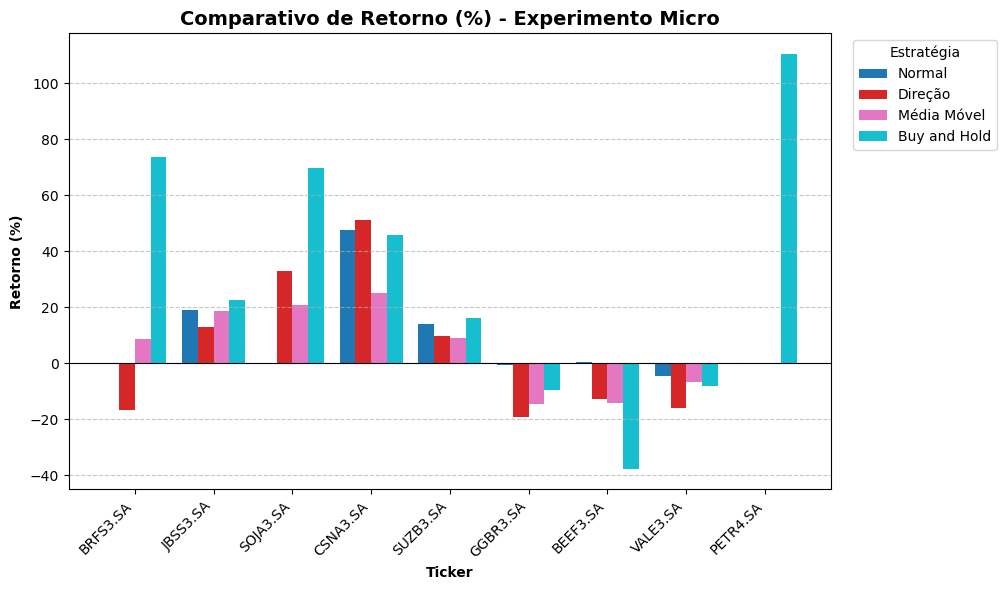

Geração dos gráficos finalizada.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# --- Configuração ---
experimentos_teste_dir = r"c:\Users\leona\pyhtonscripts\ExperimentosTeste"
experimentos = ["Macro", "Micro", "MacroMicro", "Kfold"]
estrategias = {
    "Normal": "melhores_resultados.csv",
    "Direção": "melhores_resultados_direcao.csv",
    "Média Móvel": "melhores_resultados_mediamovel.csv",
    "Buy and Hold": "melhores_resultados_buyhold.csv"
}

# --- Carregamento dos dados ---
dfs_to_merge = []

print("Carregando dados dos resultados...")

for exp in experimentos:
    exp_dir = os.path.join(experimentos_teste_dir, f"{exp}Resultados")
    if not os.path.exists(exp_dir):
        print(f"Warning: Diretório não encontrado para o experimento '{exp}': {exp_dir}")
        continue

    for nome_estrategia, nome_arquivo in estrategias.items():
        file_path = os.path.join(exp_dir, nome_arquivo)
        if os.path.exists(file_path):
            try:
                df = pd.read_csv(file_path)
                if 'Ticker' in df.columns and 'Retorno (%)' in df.columns:
                    col_name = f"Retorno_{exp}_{nome_estrategia}"
                    df_subset = df[['Ticker', 'Retorno (%)']].copy()
                    df_subset.rename(columns={'Retorno (%)': col_name}, inplace=True)
                    df_subset.set_index('Ticker', inplace=True)
                    dfs_to_merge.append(df_subset)
                    print(f"  Carregado: {exp} - {nome_estrategia}")
                else:
                    print(f"Warning: Faltando coluna 'Ticker' ou 'Retorno (%)' em {file_path}")
            except Exception as e:
                print(f"Erro ao carregar {file_path}: {e}")
        else:
            # Caso especial para Macro/Normal
            if nome_estrategia == "Normal" and exp == "Macro":
                alt_file_path = os.path.join(experimentos_teste_dir, "Macro", "melhores_resultados.csv")
                if os.path.exists(alt_file_path):
                    try:
                        df = pd.read_csv(alt_file_path)
                        if 'Ticker' in df.columns and 'Retorno (%)' in df.columns:
                            col_name = f"Retorno_{exp}_{nome_estrategia}"
                            df_subset = df[['Ticker', 'Retorno (%)']].copy()
                            df_subset.rename(columns={'Retorno (%)': col_name}, inplace=True)
                            df_subset.set_index('Ticker', inplace=True)
                            dfs_to_merge.append(df_subset)
                            print(f"  Carregado: {exp} - {nome_estrategia} (de {alt_file_path})")
                        else:
                            print(f"Warning: Faltando coluna 'Ticker' ou 'Retorno (%)' em {alt_file_path}")
                    except Exception as e:
                        print(f"Erro ao carregar {alt_file_path}: {e}")
                else:
                    print(f"Warning: Arquivo não encontrado para {exp} - {nome_estrategia}: {file_path} e {alt_file_path}")
            else:
                print(f"Warning: Arquivo não encontrado para {exp} - {nome_estrategia}: {file_path}")

# --- Unir os dados ---
if not dfs_to_merge:
    print("\nErro: Nenhum dado carregado. Não é possível gerar gráfico.")
else:
    merged_df = pd.concat(dfs_to_merge, axis=1)
    merged_df.fillna(0, inplace=True)
    print("\nDados unidos com sucesso.")

    # --- Plotagem: um gráfico para cada experimento ---
    experiments_in_data = sorted(list(set([col.split('_')[1] for col in merged_df.columns])))

    for exp_type in experiments_in_data:
        print(f"  Gerando gráfico para experimento: {exp_type}")
        exp_cols = [col for col in merged_df.columns if col.split('_')[1] == exp_type]
        df_plot = merged_df[exp_cols]

        n_strategies = len(df_plot.columns)
        n_tickers = len(df_plot.index)
        if n_strategies == 0 or n_tickers == 0:
            print(f"    Pulando {exp_type} - Sem dados para plotar.")
            continue

        bar_width = 0.8 / n_strategies
        index = np.arange(n_tickers)

        fig, ax = plt.subplots(figsize=(12, 6))
        colors = plt.cm.get_cmap('tab10', n_strategies)

        for i, col in enumerate(df_plot.columns):
            strategy_name = '_'.join(col.split('_')[2:])
            bar_position = index + i * bar_width - (n_strategies * bar_width / 2) + bar_width / 2
            ax.bar(bar_position, df_plot[col], bar_width, label=strategy_name, color=colors(i))

        ax.set_xlabel('Ticker', fontweight='bold')
        ax.set_ylabel('Retorno (%)', fontweight='bold')
        ax.set_title(f'Comparativo de Retorno (%) - Experimento {exp_type}', fontweight='bold', fontsize=14)
        ax.set_xticks(index)
        ax.set_xticklabels(df_plot.index, rotation=45, ha="right")
        ax.legend(title="Estratégia", bbox_to_anchor=(1.02, 1), loc='upper left')
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        ax.axhline(0, color='black', linewidth=0.8)

        plt.tight_layout(rect=[0, 0, 0.85, 1])
        plt.show()

    print("Geração dos gráficos finalizada.")

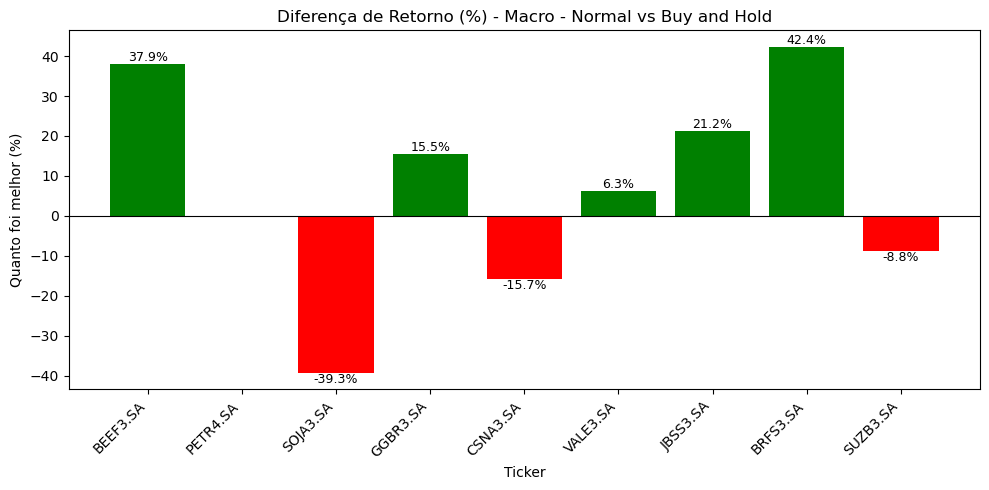


Macro - Normal vs Buy and Hold:
          Retorno (%)_estrategia  Retorno (%)_buyhold  Diferença (%)
Ticker                                                              
BEEF3.SA                0.315019           -37.628500      37.943519
PETR4.SA                     NaN           110.378876            NaN
SOJA3.SA               30.321634            69.663757     -39.342123
GGBR3.SA                5.847092            -9.637819      15.484911
CSNA3.SA               30.306581            45.968913     -15.662332
VALE3.SA               -1.889900            -8.185189       6.295288
JBSS3.SA               43.860416            22.662054      21.198362
BRFS3.SA              115.846061            73.492466      42.353595
SUZB3.SA                7.411404            16.233084      -8.821680


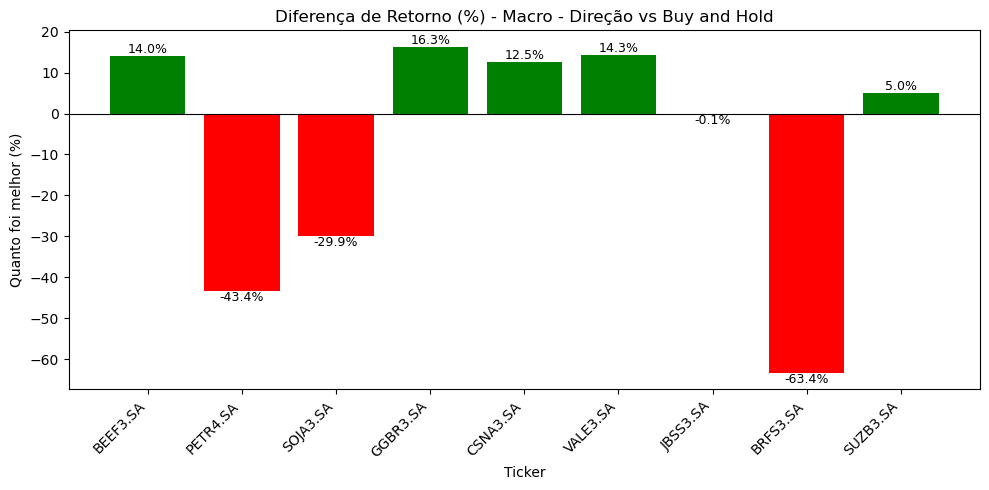


Macro - Direção vs Buy and Hold:
          Retorno (%)_estrategia  Retorno (%)_buyhold  Diferença (%)
Ticker                                                              
BEEF3.SA              -23.650931           -37.628500      13.977568
PETR4.SA               66.945036           110.378876     -43.433839
SOJA3.SA               39.731792            69.663757     -29.931965
GGBR3.SA                6.709691            -9.637819      16.347509
CSNA3.SA               58.513376            45.968913      12.544463
VALE3.SA                6.131801            -8.185189      14.316990
JBSS3.SA               22.554680            22.662054      -0.107374
BRFS3.SA               10.061208            73.492466     -63.431259
SUZB3.SA               21.214029            16.233084       4.980945


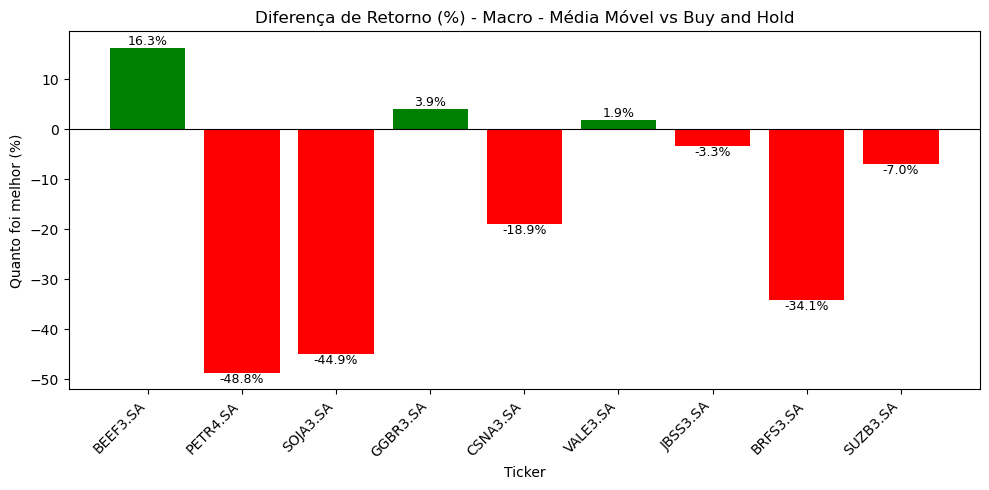


Macro - Média Móvel vs Buy and Hold:
          Retorno (%)_estrategia  Retorno (%)_buyhold  Diferença (%)
Ticker                                                              
BEEF3.SA              -21.332912           -37.628500      16.295588
PETR4.SA               61.628730           110.378876     -48.750146
SOJA3.SA               24.810322            69.663757     -44.853435
GGBR3.SA               -5.696135            -9.637819       3.941684
CSNA3.SA               27.093670            45.968913     -18.875242
VALE3.SA               -6.268464            -8.185189       1.916724
JBSS3.SA               19.360149            22.662054      -3.301906
BRFS3.SA               39.348032            73.492466     -34.144434
SUZB3.SA                9.271562            16.233084      -6.961522


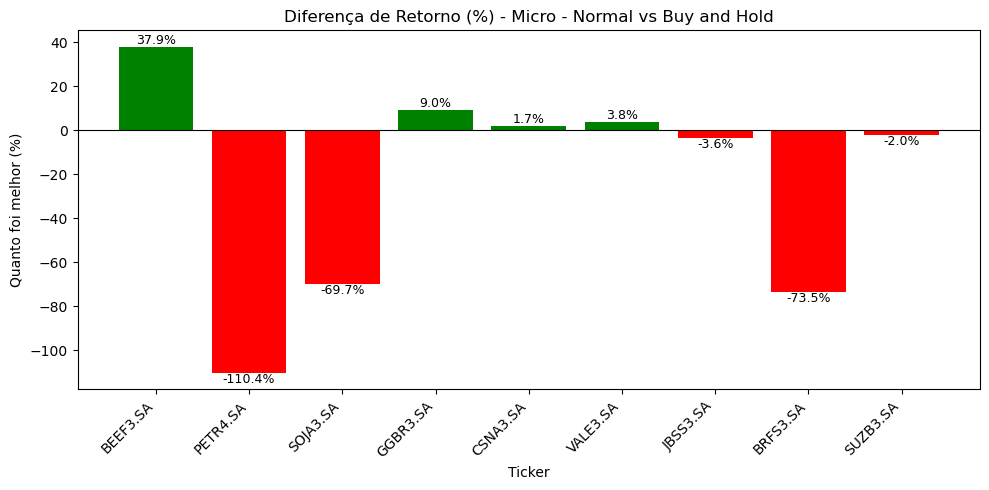


Micro - Normal vs Buy and Hold:
          Retorno (%)_estrategia  Retorno (%)_buyhold  Diferença (%)
Ticker                                                              
BEEF3.SA                0.293255           -37.628500      37.921754
PETR4.SA                0.000000           110.378876    -110.378876
SOJA3.SA                0.000000            69.663757     -69.663757
GGBR3.SA               -0.594903            -9.637819       9.042916
CSNA3.SA               47.674384            45.968913       1.705471
VALE3.SA               -4.355162            -8.185189       3.830027
JBSS3.SA               19.054348            22.662054      -3.607706
BRFS3.SA                0.000000            73.492466     -73.492466
SUZB3.SA               14.204549            16.233084      -2.028535


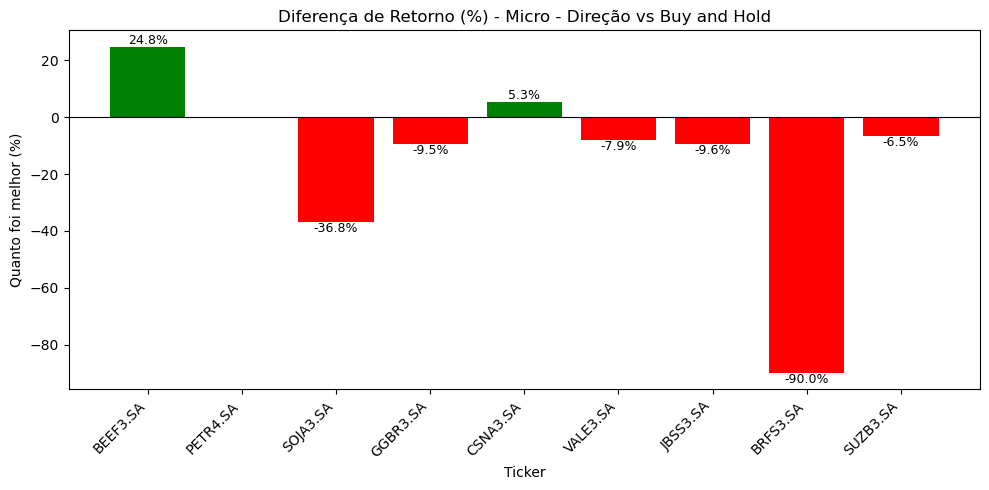


Micro - Direção vs Buy and Hold:
          Retorno (%)_estrategia  Retorno (%)_buyhold  Diferença (%)
Ticker                                                              
BEEF3.SA              -12.793308           -37.628500      24.835191
PETR4.SA                     NaN           110.378876            NaN
SOJA3.SA               32.832436            69.663757     -36.831320
GGBR3.SA              -19.134252            -9.637819      -9.496433
CSNA3.SA               51.310326            45.968913       5.341413
VALE3.SA              -16.085640            -8.185189      -7.900451
JBSS3.SA               13.100975            22.662054      -9.561079
BRFS3.SA              -16.541855            73.492466     -90.034321
SUZB3.SA                9.732299            16.233084      -6.500785


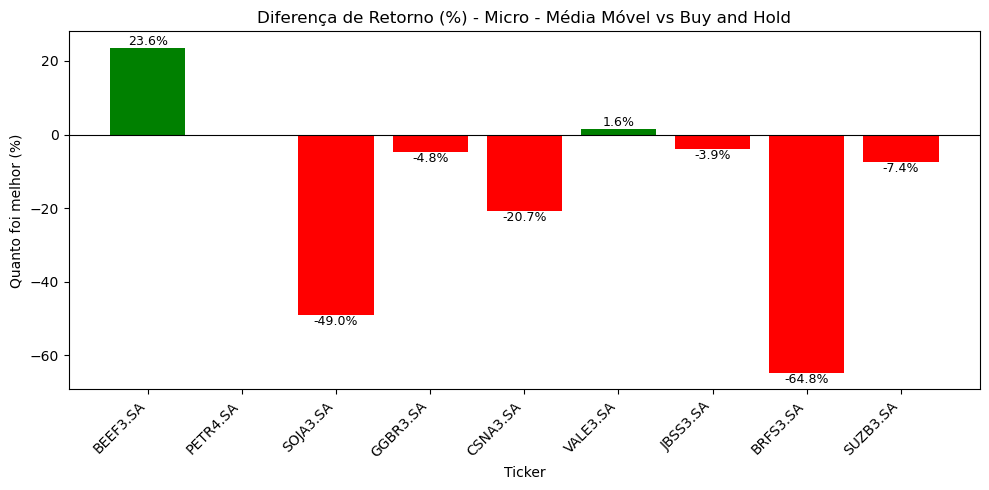


Micro - Média Móvel vs Buy and Hold:
          Retorno (%)_estrategia  Retorno (%)_buyhold  Diferença (%)
Ticker                                                              
BEEF3.SA              -14.013094           -37.628500      23.615405
PETR4.SA                     NaN           110.378876            NaN
SOJA3.SA               20.695906            69.663757     -48.967850
GGBR3.SA              -14.468367            -9.637819      -4.830548
CSNA3.SA               25.222690            45.968913     -20.746222
VALE3.SA               -6.569527            -8.185189       1.615662
JBSS3.SA               18.762336            22.662054      -3.899718
BRFS3.SA                8.676825            73.492466     -64.815641
SUZB3.SA                8.875371            16.233084      -7.357713


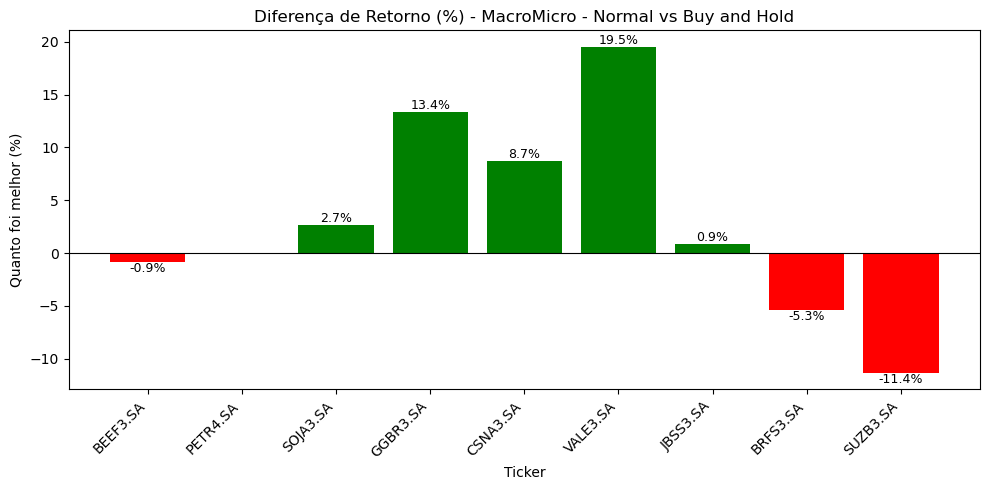


MacroMicro - Normal vs Buy and Hold:
          Retorno (%)_estrategia  Retorno (%)_buyhold  Diferença (%)
Ticker                                                              
BEEF3.SA              -38.503608           -37.628500      -0.875108
PETR4.SA                     NaN           110.378876            NaN
SOJA3.SA               72.330658            69.663757       2.666901
GGBR3.SA                3.765512            -9.637819      13.403331
CSNA3.SA               54.641895            45.968913       8.672982
VALE3.SA               11.356586            -8.185189      19.541775
JBSS3.SA               23.525868            22.662054       0.863814
BRFS3.SA               68.143267            73.492466      -5.349199
SUZB3.SA                4.874766            16.233084     -11.358318


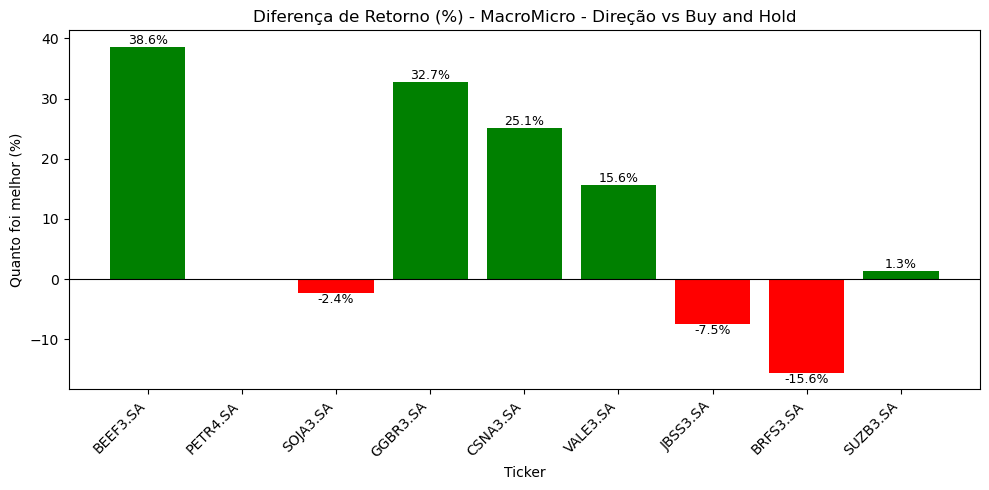


MacroMicro - Direção vs Buy and Hold:
          Retorno (%)_estrategia  Retorno (%)_buyhold  Diferença (%)
Ticker                                                              
BEEF3.SA                0.996937           -37.628500      38.625436
PETR4.SA                     NaN           110.378876            NaN
SOJA3.SA               67.310844            69.663757      -2.352912
GGBR3.SA               23.046678            -9.637819      32.684497
CSNA3.SA               71.066916            45.968913      25.098004
VALE3.SA                7.399444            -8.185189      15.584632
JBSS3.SA               15.157217            22.662054      -7.504838
BRFS3.SA               57.861752            73.492466     -15.630714
SUZB3.SA               17.525438            16.233084       1.292354


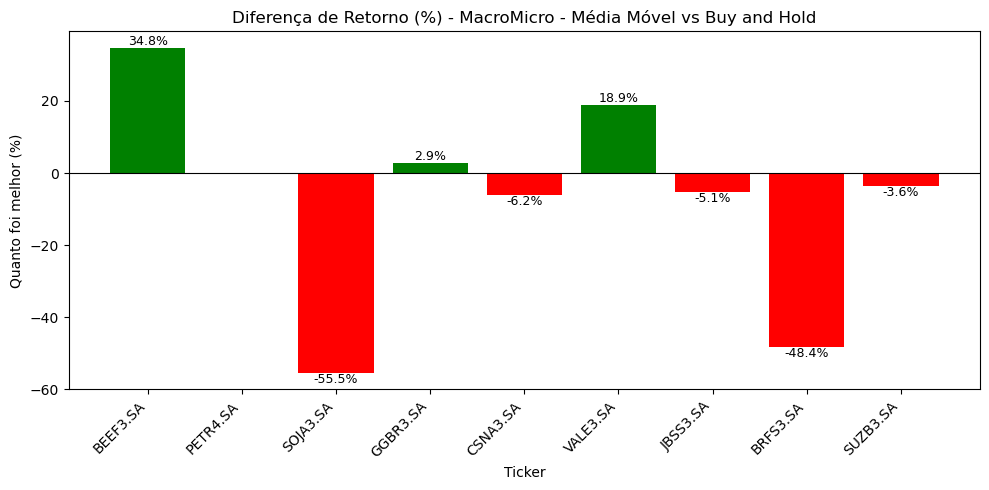


MacroMicro - Média Móvel vs Buy and Hold:
          Retorno (%)_estrategia  Retorno (%)_buyhold  Diferença (%)
Ticker                                                              
BEEF3.SA               -2.815782           -37.628500      34.812717
PETR4.SA                     NaN           110.378876            NaN
SOJA3.SA               14.116672            69.663757     -55.547085
GGBR3.SA               -6.772170            -9.637819       2.865649
CSNA3.SA               39.792307            45.968913      -6.176605
VALE3.SA               10.756827            -8.185189      18.942015
JBSS3.SA               17.534628            22.662054      -5.127426
BRFS3.SA               25.123111            73.492466     -48.369355
SUZB3.SA               12.679937            16.233084      -3.553146


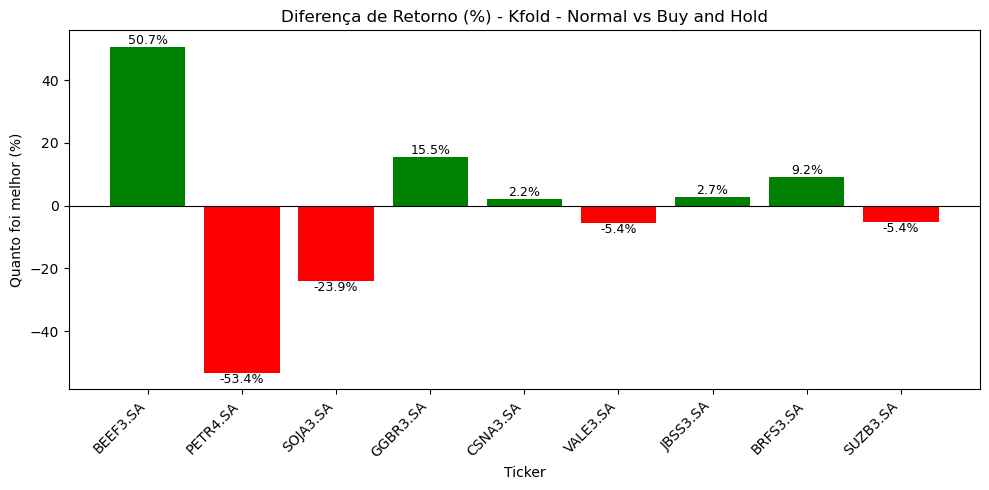


Kfold - Normal vs Buy and Hold:
          Retorno (%)_estrategia  Retorno (%)_buyhold  Diferença (%)
Ticker                                                              
BEEF3.SA               13.041388           -37.628500      50.669888
PETR4.SA               56.995396           110.378876     -53.383480
SOJA3.SA               45.806567            69.663757     -23.857190
GGBR3.SA                5.835491            -9.637819      15.473310
CSNA3.SA               48.164052            45.968913       2.195139
VALE3.SA              -13.617669            -8.185189      -5.432480
JBSS3.SA               25.350212            22.662054       2.688158
BRFS3.SA               82.671956            73.492466       9.179490
SUZB3.SA               10.870330            16.233084      -5.362754


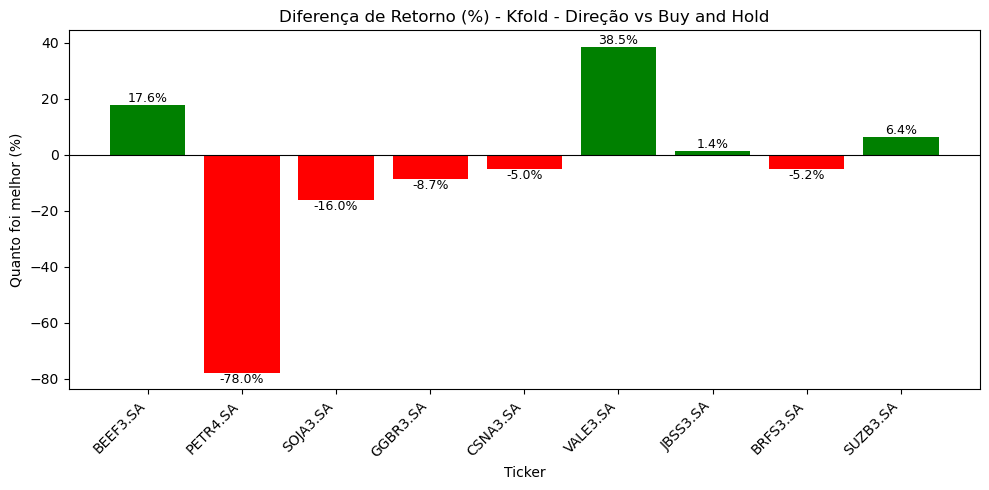


Kfold - Direção vs Buy and Hold:
          Retorno (%)_estrategia  Retorno (%)_buyhold  Diferença (%)
Ticker                                                              
BEEF3.SA              -20.017594           -37.628500      17.610905
PETR4.SA               32.364980           110.378876     -78.013895
SOJA3.SA               53.636016            69.663757     -16.027741
GGBR3.SA              -18.381969            -9.637819      -8.744150
CSNA3.SA               40.945800            45.968913      -5.023113
VALE3.SA               30.348034            -8.185189      38.533222
JBSS3.SA               24.019749            22.662054       1.357695
BRFS3.SA               68.283693            73.492466      -5.208773
SUZB3.SA               22.616460            16.233084       6.383377


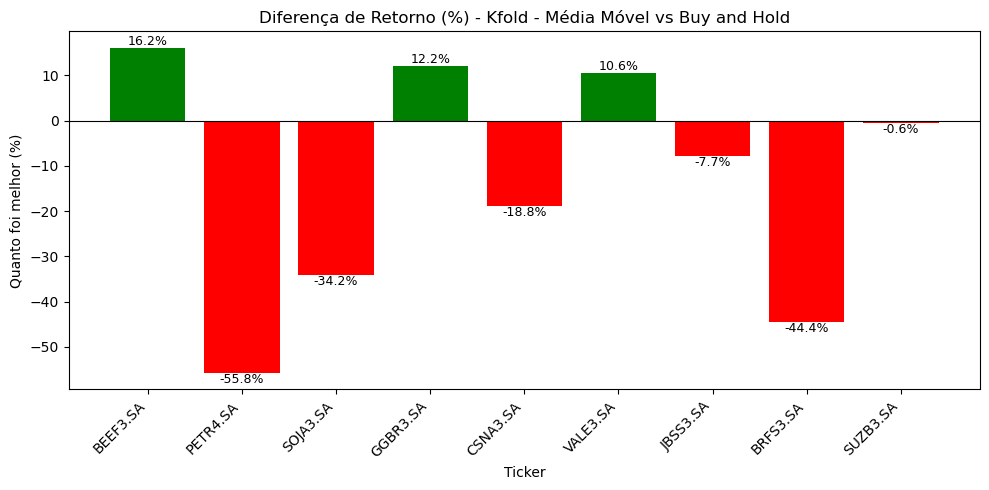


Kfold - Média Móvel vs Buy and Hold:
          Retorno (%)_estrategia  Retorno (%)_buyhold  Diferença (%)
Ticker                                                              
BEEF3.SA              -21.473343           -37.628500      16.155156
PETR4.SA               54.566160           110.378876     -55.812716
SOJA3.SA               35.494161            69.663757     -34.169595
GGBR3.SA                2.521053            -9.637819      12.158872
CSNA3.SA               27.199599            45.968913     -18.769314
VALE3.SA                2.387878            -8.185189      10.573066
JBSS3.SA               14.955167            22.662054      -7.706887
BRFS3.SA               29.067984            73.492466     -44.424482
SUZB3.SA               15.682077            16.233084      -0.551007


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# --- Configuração ---
experimentos_teste_dir = r"c:\\Users\\leona\\pyhtonscripts\\ExperimentosTeste"
experimentos = ["Macro", "Micro", "MacroMicro", "Kfold"]
estrategias = {
    "Normal": "melhores_resultados.csv",
    "Direção": "melhores_resultados_direcao.csv",
    "Média Móvel": "melhores_resultados_mediamovel.csv",
    "Buy and Hold": "melhores_resultados_buyhold.csv"
}

# Defina a lista de tickers que você quer manter sempre na mesma ordem
TICKERS_PADRAO = [
    "BEEF3.SA", "PETR4.SA", "SOJA3.SA", "GGBR3.SA", "CSNA3.SA",
    "VALE3.SA", "JBSS3.SA", "BRFS3.SA", "SUZB3.SA"
]

# --- Carregamento dos dados ---
dfs = {}
for exp in experimentos:
    exp_dir = os.path.join(experimentos_teste_dir, f"{exp}Resultados")
    for nome_estrategia, nome_arquivo in estrategias.items():
        file_path = os.path.join(exp_dir, nome_arquivo)
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            if 'Ticker' in df.columns and 'Retorno (%)' in df.columns:
                key = (exp, nome_estrategia)
                df = df[['Ticker', 'Retorno (%)']].set_index('Ticker')
                # Reindexa para garantir a ordem e presença dos tickers
                df = df.reindex(TICKERS_PADRAO)
                dfs[key] = df
        elif nome_estrategia == "Normal" and exp == "Macro":
            alt_file_path = os.path.join(experimentos_teste_dir, "Macro", "melhores_resultados.csv")
            if os.path.exists(alt_file_path):
                df = pd.read_csv(alt_file_path)
                if 'Ticker' in df.columns and 'Retorno (%)' in df.columns:
                    key = (exp, nome_estrategia)
                    df = df[['Ticker', 'Retorno (%)']].set_index('Ticker')
                    df = df.reindex(TICKERS_PADRAO)
                    dfs[key] = df

# --- Comparação com Buy and Hold ---
for exp in experimentos:
    bh = dfs.get((exp, "Buy and Hold"))
    if bh is None:
        print(f"Sem Buy and Hold para {exp}")
        continue

    for nome_estrategia in ["Normal", "Direção", "Média Móvel"]:
        df = dfs.get((exp, nome_estrategia))
        if df is None:
            continue

        # Junta os retornos e mantém a ordem dos tickers
        comp = df.join(bh, lsuffix='_estrategia', rsuffix='_buyhold', how='outer')
        comp['Diferença (%)'] = comp['Retorno (%)_estrategia'] - comp['Retorno (%)_buyhold']

        # Garante a ordem dos tickers
        comp = comp.reindex(TICKERS_PADRAO)

        # Plot
        plt.figure(figsize=(10, 5))
        bars = plt.bar(comp.index, comp['Diferença (%)'], color=['green' if (not np.isnan(x) and x > 0) else 'red' for x in comp['Diferença (%)']])
        plt.axhline(0, color='black', linewidth=0.8)
        plt.title(f'Diferença de Retorno (%) - {exp} - {nome_estrategia} vs Buy and Hold')
        plt.ylabel('Quanto foi melhor (%)')
        plt.xlabel('Ticker')
        plt.xticks(rotation=45, ha='right')
        for bar, yval in zip(bars, comp['Diferença (%)']):
            if not np.isnan(yval):
                plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}%', ha='center', va='bottom' if yval>=0 else 'top', fontsize=9)
        plt.tight_layout()
        plt.show()

        # Exibe tabela para referência
        print(f"\n{exp} - {nome_estrategia} vs Buy and Hold:")
        print(comp[['Retorno (%)_estrategia', 'Retorno (%)_buyhold', 'Diferença (%)']])